In [32]:
import matplotlib as mpl
print(mpl.colormaps())


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

Eigenvalues of A: [ 1.92407874+2.21779664j  0.11142515-1.08495297j -0.3803484 +0.21620024j
  0.34321205-0.05101335j]


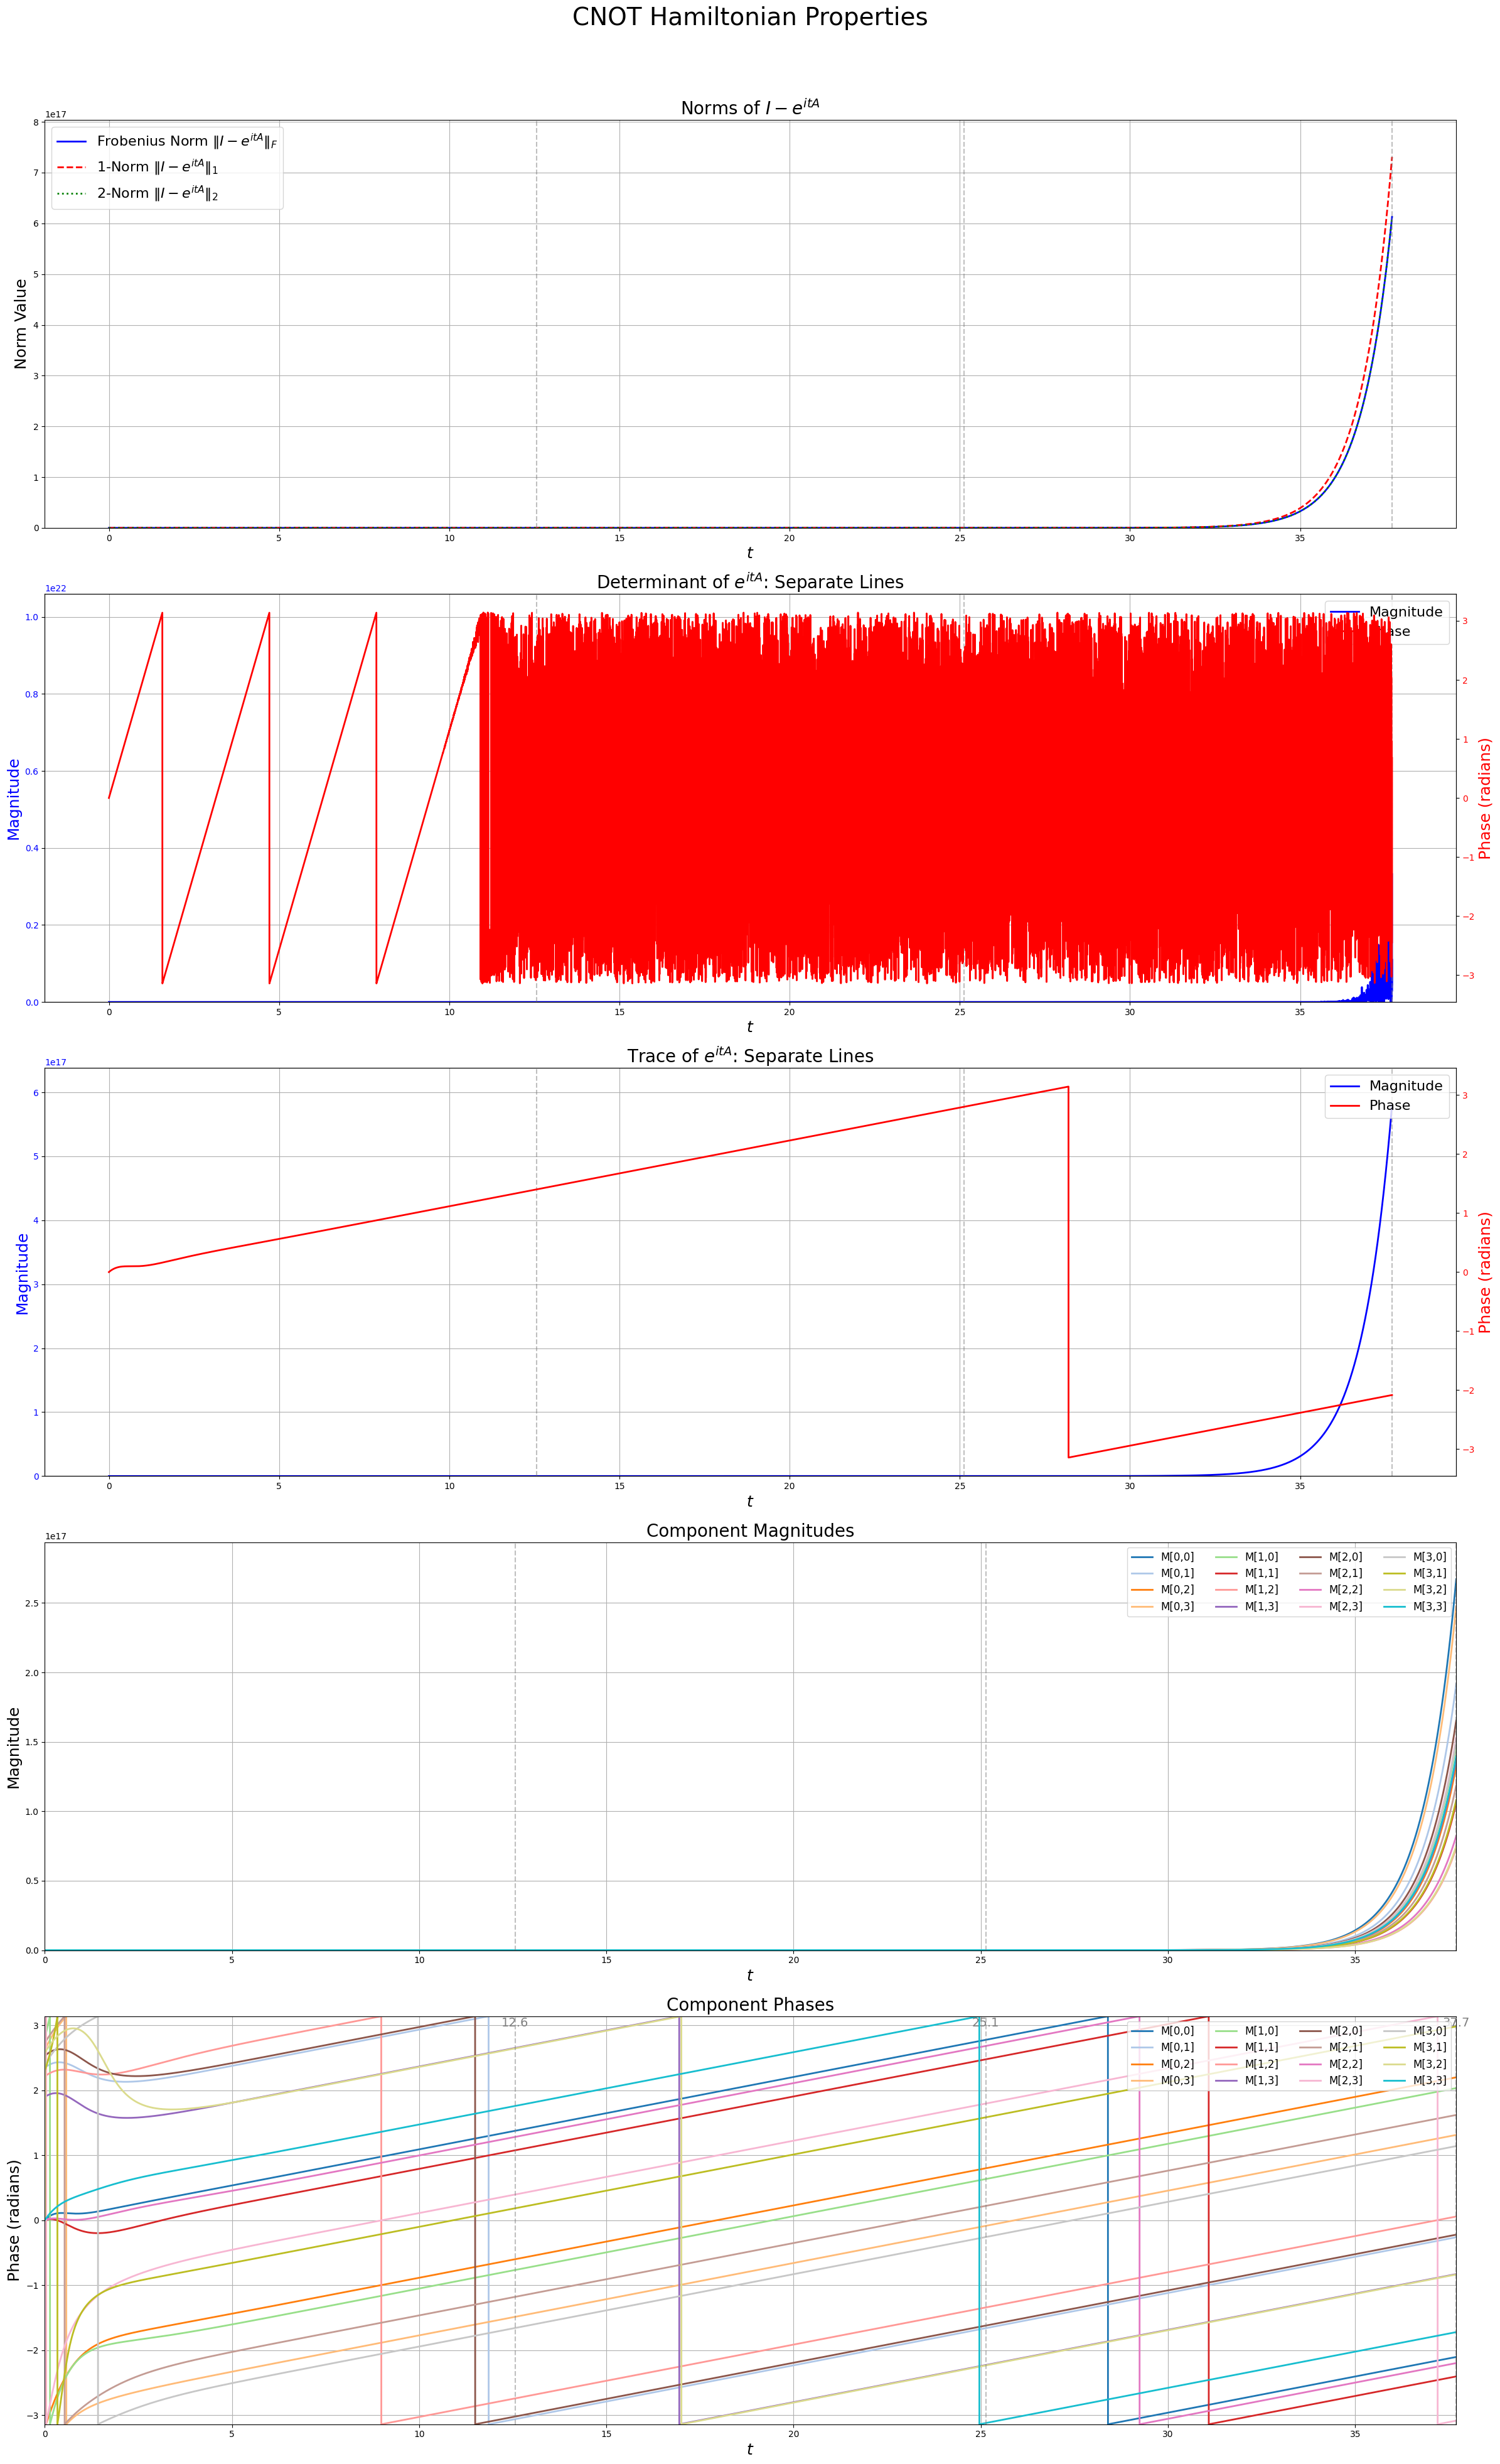

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# ================================
# Options: Change these as desired
# ================================
phase_cmap = 'hsv'         # For the phase plots (determinant/trace)
plot_separate_lines = True  # For determinant/trace: True -> separate lines; False -> scatter

# ================================
# Define a 4x4 matrix A (using a block structure)
# ================================
A = np.array([
    [0,    0,    0, 0],
    [0, -0.5,  0.5, 0],
    [0,  0.5, -0.5, 0],
    [0,    0,    0, 0]
], dtype=np.complex128)

# Uncomment below to use a random complex matrix instead:
#n = 4
#A = np.random.rand(n, n) + 1j * np.random.rand(n, n)

# Optionally, compute the eigenvalues to analyze periodicity:
eigs = np.linalg.eigvals(A)
print("Eigenvalues of A:", eigs)
# Even if the eigenvalues are incommensurate, we mark a reference period.
period = 4 * np.pi  # adjust as needed

# ================================
# Define the range for t
# ================================
num_points = 20000
t_values = np.linspace(0, 12*np.pi, num_points)

# Prepare lists to store the results
norm_fro_list = []   # Frobenius norm
norm_1_list   = []   # 1-Norm (max column sum)
norm_2_list   = []   # 2-Norm (spectral norm)
det_values    = []
trace_values  = []

# For the component evolution plot, store the entire matrix for each t.
components = []

I = np.eye(A.shape[0])  # Identity matrix

# Loop over t and compute e^(i * t * A)
for t in t_values:
    M = expm(1j * t * A)   # Matrix exponential
    diff = I - M           # Difference matrix

    # Compute norms
    norm_fro = np.linalg.norm(diff, 'fro')
    norm_1   = np.linalg.norm(diff, 1)
    norm_2   = np.linalg.norm(diff, 2)
    norm_fro_list.append(norm_fro)
    norm_1_list.append(norm_1)
    norm_2_list.append(norm_2)
    
    # Compute determinant and trace
    det_values.append(np.linalg.det(M))
    trace_values.append(np.trace(M))
    
    # Store the resulting matrix for later plotting of its components.
    components.append(M)

# Convert lists to arrays
norm_fro_list = np.array(norm_fro_list)
norm_1_list   = np.array(norm_1_list)
norm_2_list   = np.array(norm_2_list)
det_values    = np.array(det_values)
trace_values  = np.array(trace_values)
components    = np.array(components)  # Shape: (num_points, 4, 4)

# Compute magnitude and phase for determinant and trace
det_mag = np.abs(det_values)
det_phase = np.angle(det_values)
trace_mag = np.abs(trace_values)
trace_phase = np.angle(trace_values)

# Prepare colors for the 16 components using the 'tab20' colormap.
component_cmap = plt.get_cmap('tab20')
colors = [component_cmap(i/16) for i in range(16)]

# ================================
# Create subplots: 5 rows, 1 column
# ================================
fig, axs = plt.subplots(5, 1, figsize=(24, 40))
fig.suptitle("CNOT Hamiltonian Properties", fontsize=28, y=0.98)

# Subplot 1: Norms of I - e^(i t A)
axs[0].plot(t_values, norm_fro_list, label=r'Frobenius Norm $\|I - e^{i t A}\|_F$', color='blue', linewidth=2)
axs[0].plot(t_values, norm_1_list, label=r'1-Norm $\|I - e^{i t A}\|_1$', color='red', linestyle='--', linewidth=2)
axs[0].plot(t_values, norm_2_list, label=r'2-Norm $\|I - e^{i t A}\|_2$', color='green', linestyle=':', linewidth=2)
axs[0].set_title("Norms of $I - e^{i t A}$", fontsize=20)
axs[0].set_xlabel(r"$t$", fontsize=18)
axs[0].set_ylabel("Norm Value", fontsize=18)
axs[0].legend(fontsize=16)
axs[0].grid(True)
axs[0].set_ylim(0, 1.1 * max(np.max(norm_fro_list), np.max(norm_1_list), np.max(norm_2_list)))

# Subplot 2: Determinant of e^(i t A)
if plot_separate_lines:
    l1, = axs[1].plot(t_values, det_mag, label="Magnitude", color='blue', linewidth=2)
    axs[1].set_ylabel("Magnitude", fontsize=18, color='blue')
    axs[1].tick_params(axis='y', labelcolor='blue')
    axs[1].set_title("Determinant of $e^{i t A}$: Separate Lines", fontsize=20)
    axs[1].set_xlabel(r"$t$", fontsize=18)
    axs[1].grid(True)
    axs[1].set_ylim(0, np.max(det_mag)*1.1)
    
    ax_det_phase = axs[1].twinx()
    l2, = ax_det_phase.plot(t_values, det_phase, label="Phase", color='red', linewidth=2)
    ax_det_phase.set_ylabel("Phase (radians)", fontsize=18, color='red')
    ax_det_phase.tick_params(axis='y', labelcolor='red')
    lines = [l1, l2]
    labels = [line.get_label() for line in lines]
    axs[1].legend(lines, labels, fontsize=16, loc='upper right')
else:
    sc_det = axs[1].scatter(t_values, det_mag, c=det_phase, cmap=phase_cmap, s=15)
    axs[1].set_title("Magnitude and Phase of $\det(e^{i t A})$", fontsize=20)
    axs[1].set_xlabel(r"$t$", fontsize=18)
    axs[1].set_ylabel("Magnitude", fontsize=18)
    axs[1].grid(True)
    cbar_det = plt.colorbar(sc_det, ax=axs[1], orientation='vertical')
    cbar_det.set_label("Phase (radians)", fontsize=16)
    axs[1].set_ylim(0, np.max(det_mag)*1.1)

# Subplot 3: Trace of e^(i t A)
if plot_separate_lines:
    l3, = axs[2].plot(t_values, trace_mag, label="Magnitude", color='blue', linewidth=2)
    axs[2].set_ylabel("Magnitude", fontsize=18, color='blue')
    axs[2].tick_params(axis='y', labelcolor='blue')
    axs[2].set_title("Trace of $e^{i t A}$: Separate Lines", fontsize=20)
    axs[2].set_xlabel(r"$t$", fontsize=18)
    axs[2].grid(True)
    axs[2].set_ylim(0, np.max(trace_mag)*1.1)
    
    ax_trace_phase = axs[2].twinx()
    l4, = ax_trace_phase.plot(t_values, trace_phase, label="Phase", color='red', linewidth=2)
    ax_trace_phase.set_ylabel("Phase (radians)", fontsize=18, color='red')
    ax_trace_phase.tick_params(axis='y', labelcolor='red')
    lines = [l3, l4]
    labels = [line.get_label() for line in lines]
    axs[2].legend(lines, labels, fontsize=16, loc='upper right')
else:
    sc_trace = axs[2].scatter(t_values, trace_mag, c=trace_phase, cmap=phase_cmap, s=15)
    axs[2].set_title("Magnitude and Phase of $\mathrm{tr}(e^{i t A})$", fontsize=20)
    axs[2].set_xlabel(r"$t$", fontsize=18)
    axs[2].set_ylabel("Magnitude", fontsize=18)
    axs[2].grid(True)
    cbar_trace = plt.colorbar(sc_trace, ax=axs[2], orientation='vertical')
    cbar_trace.set_label("Phase (radians)", fontsize=16)
    axs[2].set_ylim(0, np.max(trace_mag)*1.1)

# Subplot 4: Component Magnitudes
ax4 = axs[3]
ax4.set_title("Component Magnitudes", fontsize=20)
ax4.set_xlabel(r"$t$", fontsize=18)
ax4.set_ylabel("Magnitude", fontsize=18)
ax4.grid(True)

# Plot each of the 16 components with a distinct color
handles_mag = []
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        comp = components[:, i, j]
        comp_mag = np.abs(comp)
        line, = ax4.plot(t_values, comp_mag, color=colors[idx], linewidth=2, label=f"M[{i},{j}]")
        handles_mag.append(line)
ax4.legend(handles=handles_mag, fontsize=12, loc='upper right', ncol=4)
ax4.set_xlim(t_values[0], t_values[-1])
ax4.set_ylim(0, np.max(np.abs(components)) * 1.1)

# Subplot 5: Component Phases
ax5 = axs[4]
ax5.set_title("Component Phases", fontsize=20)
ax5.set_xlabel(r"$t$", fontsize=18)
ax5.set_ylabel("Phase (radians)", fontsize=18)
ax5.grid(True)

# Plot the phase of each component
handles_phase = []
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        comp = components[:, i, j]
        comp_phase = np.angle(comp)
        line, = ax5.plot(t_values, comp_phase, color=colors[idx], linewidth=2, label=f"M[{i},{j}]")
        handles_phase.append(line)
ax5.legend(handles=handles_phase, fontsize=12, loc='upper right', ncol=4)
ax5.set_xlim(t_values[0], t_values[-1])
ax5.set_ylim(-np.pi, np.pi)

# Draw vertical dashed lines at multiples of the period on all subplots with t on the x-axis.
max_t_val = t_values[-1]
num_periods = int(max_t_val // period)
for k in range(1, num_periods + 1):
    t_line = k * period
    for ax in axs:
        ax.axvline(x=t_line, color='grey', linestyle='--', alpha=0.5)
        ylim = ax.get_ylim()
        if np.isfinite(ylim[1]) and ylim[1] < 1e6:
            ax.text(t_line, ylim[1]*0.95, f'{t_line:.1f}', horizontalalignment='center', color='grey', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
